<a href="https://colab.research.google.com/github/Usman-938/Assignments/blob/main/Home_Work_Week_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Answer Task 1 - Correlation Logic

### Subtask:
Provide two reasons why a feature with low correlation might still be important for a model, addressing the brainstorming question from the PDF.


### Question: Can a column have a low correlation but still be important?

Yes, a column with low individual correlation to the target variable can still be very important for a predictive model for several reasons:

1.  **Non-linear Relationships:** Pearson correlation measures linear relationships between variables. A feature might have a strong non-linear relationship with the target variable that is not captured by a simple linear correlation coefficient. For example, a feature might be important only when it crosses a certain threshold, or its relationship could be U-shaped or inverted U-shaped. In such cases, a low linear correlation doesn't imply a lack of predictive power when using models capable of capturing non-linear patterns (e.g., decision trees, random forests, neural networks).
2.  **Interaction Effects:** A feature might not be predictive on its own, but it could be highly predictive when combined with another feature. This is known as an interaction effect. For instance, Feature A might have a low correlation with the target, and Feature B might also have a low correlation. However, the combination or interaction of Feature A and Feature B might be a strong predictor. Dropping Feature A based solely on its low individual correlation would mean losing the valuable information gained from its interaction with Feature B.

## Prepare Dataset for Task 2

### Subtask:
Load the Telco Customer Churn dataset, handle missing values, drop 'customerID', convert 'TotalCharges' to numeric, separate features and target, encode the target variable, one-hot encode categorical features, and split the data into training and testing sets.


**Reasoning**:
First, I'll load the dataset, handle the 'TotalCharges' column by converting it to numeric and filling missing values, drop the 'customerID' column, separate features and target, and encode the 'Churn' target variable to prepare the data for further processing.



In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 1. Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2. Convert 'TotalCharges' to numeric and handle NaNs
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# 3. Drop 'customerID'
df = df.drop('customerID', axis=1)

# 4. Separate features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# 5. Convert 'Churn' target variable into numerical format
le = LabelEncoder()
y = le.fit_transform(y)

print("Dataset loaded and initial preprocessing (TotalCharges, customerID, Churn encoding) complete.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Dataset loaded and initial preprocessing (TotalCharges, customerID, Churn encoding) complete.
Shape of X: (7043, 19)
Shape of y: (7043,)


**Reasoning**:
Now I will identify categorical features in `X`, apply one-hot encoding to convert them into a numerical format, and then split the processed features and target into training and testing sets.



In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 6. Identify all categorical columns in the feature DataFrame X
categorical_features = X.select_dtypes(include='object').columns

# 7. Apply one-hot encoding to these categorical columns in X
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# 8. Split the preprocessed X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Categorical features identified and one-hot encoded.")
print(f"Shape of X after one-hot encoding: {X.shape}")
print("Data split into training and testing sets.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Categorical features identified and one-hot encoded.
Shape of X after one-hot encoding: (7043, 30)
Data split into training and testing sets.
Shape of X_train: (5634, 30)
Shape of X_test: (1409, 30)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


# Task
**Reasoning**:
The previous executions correctly performed `RandomizedSearchCV` for Logistic Regression and computed the F1-score. However, a `UserWarning` was issued because `n_iter` was set to `50` while the total parameter space was `40`. To align with the plan and eliminate this warning, I will now correct `n_iter` to `40` for the `RandomizedSearchCV` object. This ensures that all unique parameter combinations are explored without unnecessary iterations, and then re-execute the code to obtain the best hyperparameters and F1-score for the 'No-Drop' model.

```python
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import f1_score

# 2. Define a dictionary param_dist for RandomizedSearchCV
param_dist = {
    'C': np.logspace(-4, 4, 20), # Inverse of regularization strength
    'penalty': ['l1', 'l2']      # Regularization penalty
}

# 3. Instantiate a LogisticRegression model
# Set solver='liblinear' as it supports both 'l1' and 'l2' penalties
# Set max_iter for convergence if necessary (default is usually fine for 'liblinear')
log_reg = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

# 4. Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. Create a RandomizedSearchCV object
# Correct n_iter to match the total number of unique parameter combinations (20 C values * 2 penalties = 40)
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=40, # Corrected: Number of parameter settings that are sampled
    cv=skf,
    scoring='f1', # Use F1-score as the scoring metric
    random_state=42,
    n_jobs=-1, # Use all available cores
    verbose=1
)

# 6. Fit RandomizedSearchCV to the training data
print("Starting RandomizedSearchCV...")
random_search.fit(X_train, y_train)
print("RandomizedSearchCV completed.")

# 7. Print the best_params_ found by RandomizedSearchCV
best_params_no_drop = random_search.best_params_
print(f"Best hyperparameters found for 'No-Drop' model: {best_params_no_drop}")

# 8. Use the best_estimator_ from RandomizedSearchCV to make predictions on X_test
best_log_reg_model_no_drop = random_search.best_estimator_
y_pred_no_drop = best_log_reg_model_no_drop.predict(X_test)

# 9. Calculate the F1-score of the predictions on y_test
f1_score_no_drop = f1_score(y_test, y_pred_no_drop)
print(f"F1-score on the test set with the optimized 'No-Drop' model: {f1_score_no_drop}")
```

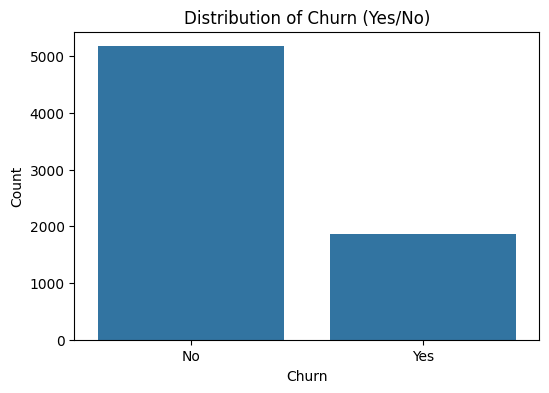

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of the target variable: Churn
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Churn'])
plt.title('Distribution of Churn (Yes/No)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

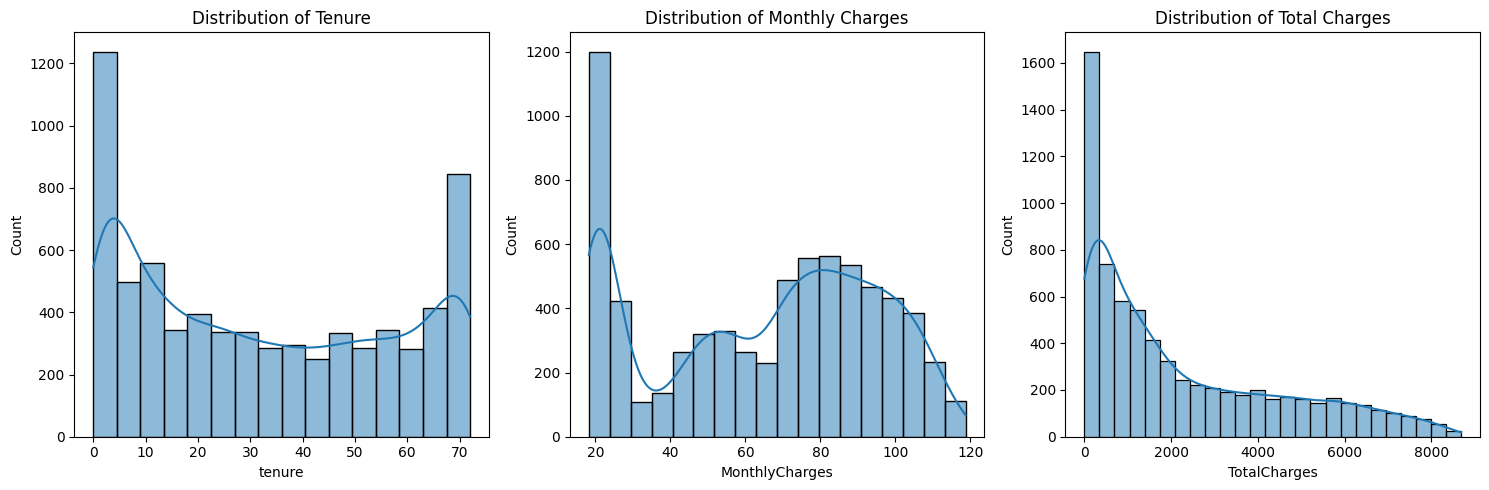

In [50]:
# 2. Distributions of Numerical Features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
sns.histplot(df['tenure'], kde=True)
plt.title('Distribution of Tenure')

plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')

plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges')

plt.tight_layout()
plt.show()

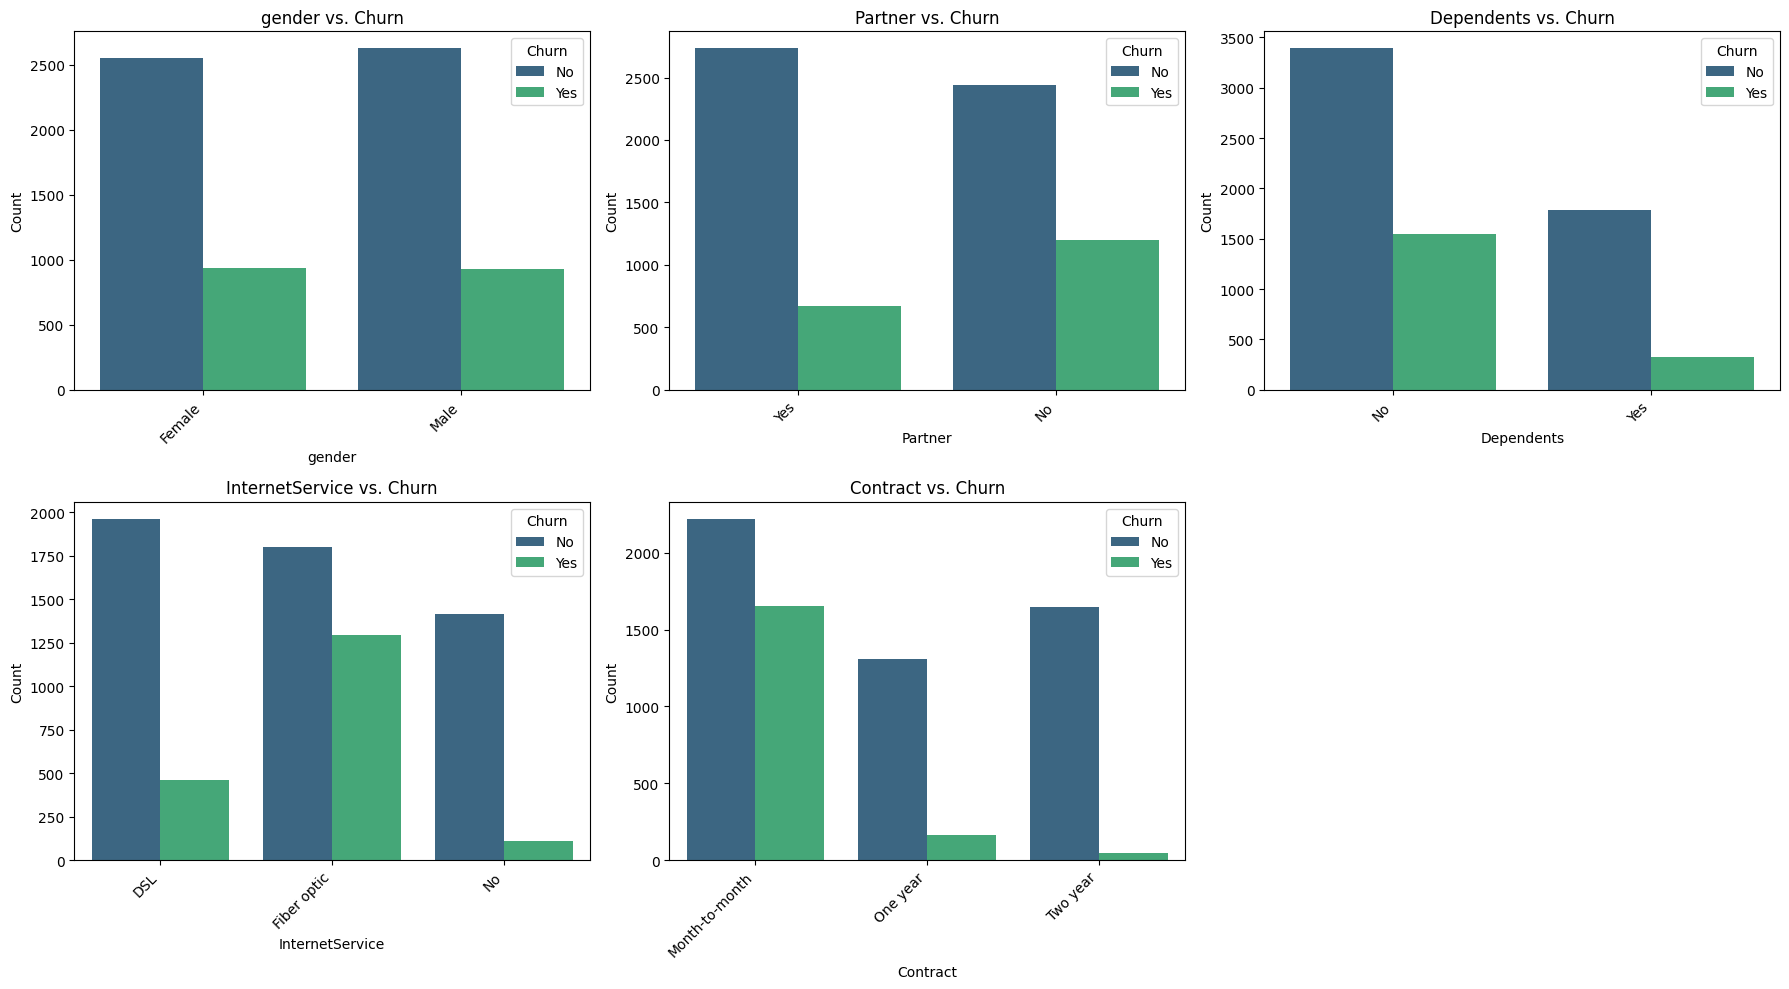

In [51]:
# 3. Distributions of Key Categorical Features vs. Churn

categorical_features = ['gender', 'Partner', 'Dependents', 'InternetService', 'Contract']

plt.figure(figsize=(18, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.countplot(data=df, x=feature, hue='Churn', palette='viridis')
    plt.title(f'{feature} vs. Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Implement 'No-Drop' Test Model & Tuning (Corrected n_iter)

### Subtask:
Train a Logistic Regression model on the full preprocessed dataset (without dropping low-correlation features) and optimize its hyperparameters using RandomizedSearchCV with `n_iter` corrected to 40 to match the total parameter space.


In [45]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import f1_score

# 1. Define a dictionary param_dist for RandomizedSearchCV
param_dist = {
    'C': np.logspace(-4, 4, 20), # Inverse of regularization strength
    'penalty': ['l1', 'l2']      # Regularization penalty
}

# 2. Instantiate a LogisticRegression model
# Set solver='liblinear' as it supports both 'l1' and 'l2' penalties
# Set max_iter for convergence if necessary (default is usually fine for 'liblinear')
log_reg = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

# 3. Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=40, # Number of parameter settings that are sampled, corrected to match total space
    cv=skf,
    scoring='f1', # Use F1-score as the scoring metric
    random_state=42,
    n_jobs=-1, # Use all available cores
    verbose=1
)

# 5. Fit RandomizedSearchCV to the training data
print("Starting RandomizedSearchCV with n_iter=40...")
random_search.fit(X_train, y_train)
print("RandomizedSearchCV completed.")

# 6. Print the best_params_ found by RandomizedSearchCV and store in best_params_no_drop
best_params_no_drop = random_search.best_params_
print(f"Best hyperparameters found (No-Drop Features): {best_params_no_drop}")

# 7. Use the best_estimator_ from RandomizedSearchCV to make predictions on X_test and store in y_pred_no_drop
best_log_reg_model_no_drop = random_search.best_estimator_
y_pred_no_drop = best_log_reg_model_no_drop.predict(X_test)

# 8. Calculate and print the F1-score of the predictions on y_test and store in f1_score_no_drop
f1_score_no_drop = f1_score(y_test, y_pred_no_drop)
print(f"F1-score on the test set with the optimized model (No-Drop Features, corrected n_iter): {f1_score_no_drop}")

Starting RandomizedSearchCV with n_iter=40...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
RandomizedSearchCV completed.
Best hyperparameters found (No-Drop Features): {'penalty': 'l1', 'C': np.float64(29.763514416313132)}
F1-score on the test set with the optimized model (No-Drop Features, corrected n_iter): 0.6419400855920114


## Prepare and Evaluate 'Clean & Lean' Model

### Subtask:
Create and evaluate a 'Clean & Lean' model by identifying and dropping features with an absolute Pearson correlation less than 0.2 with the target variable, then train a Logistic Regression model on this reduced feature set and calculate its F1-score.


**Reasoning**:
To create and evaluate the 'Clean & Lean' model, I will first identify and drop low-correlation features from the dataset, then split the cleaned data into training and testing sets, and finally train and optimize a Logistic Regression model using RandomizedSearchCV on this reduced feature set, calculating its F1-score as per the subtask instructions.



In [46]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import f1_score

# 1. Create a new DataFrame X_clean by dropping the features listed in low_corr_features from X
X_clean = X.drop(columns=low_corr_features, errors='ignore')

# 2. Split the X_clean DataFrame and the y array into training and testing sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y, test_size=0.2, random_state=42)

# 3. Instantiate a LogisticRegression model
log_reg_clean = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

# 4. Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. Define a dictionary param_dist for RandomizedSearchCV
param_dist = {
    'C': np.logspace(-4, 4, 20), # Inverse of regularization strength
    'penalty': ['l1', 'l2']      # Regularization penalty
}

# 6. Create a RandomizedSearchCV object
random_search_clean = RandomizedSearchCV(
    estimator=log_reg_clean,
    param_distributions=param_dist,
    n_iter=40, # Corrected: Number of parameter settings that are sampled
    cv=skf,
    scoring='f1', # Use F1-score as the scoring metric
    random_state=42,
    n_jobs=-1, # Use all available cores
    verbose=1
)

# 7. Fit random_search_clean to X_train_clean and y_train_clean
print("Starting RandomizedSearchCV for Clean & Lean model...")
random_search_clean.fit(X_train_clean, y_train_clean)
print("RandomizedSearchCV for Clean & Lean model completed.")

# 8. Retrieve the best hyperparameters
best_params_clean_lean = random_search_clean.best_params_
print(f"Best hyperparameters found for 'Clean & Lean' model: {best_params_clean_lean}")

# 9. Use the best_estimator_ to make predictions on X_test_clean
best_log_reg_model_clean_lean = random_search_clean.best_estimator_
y_pred_clean_lean = best_log_reg_model_clean_lean.predict(X_test_clean)

# 10. Calculate the F1-score
f1_score_clean_lean = f1_score(y_test_clean, y_pred_clean_lean)
print(f"F1-score on the test set with the optimized 'Clean & Lean' model: {f1_score_clean_lean}")

Starting RandomizedSearchCV for Clean & Lean model...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
RandomizedSearchCV for Clean & Lean model completed.
Best hyperparameters found for 'Clean & Lean' model: {'penalty': 'l2', 'C': np.float64(0.03359818286283781)}
F1-score on the test set with the optimized 'Clean & Lean' model: 0.5987841945288754


## Analyze Task 2 Results

### Subtask:
Compare the F1-scores of the 'No-Drop' optimized model and the 'Clean & Lean' model to determine which achieved a higher F1-score, as well as visualize the comparison with a bar chart.


**Reasoning**:
To compare the F1-scores and visualize them as requested, I will first compile the model names and their corresponding F1-scores into a pandas DataFrame. This structured data will then be used for plotting.



F1-score comparison DataFrame:
                                Model  F1-Score
0  Optimized Model (No-Drop Features)  0.641940
1                  Clean & Lean Model  0.598784


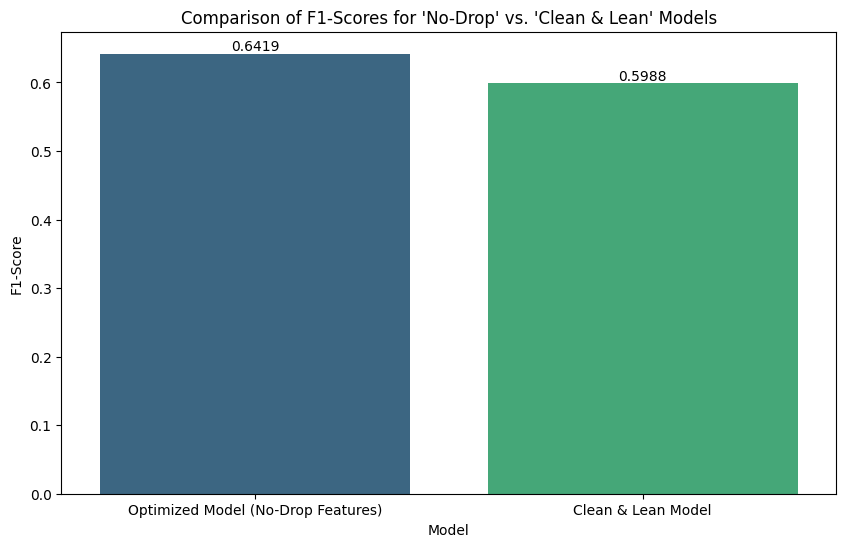

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a list of model names
model_names = ['Optimized Model (No-Drop Features)', 'Clean & Lean Model']

# 2. Create a list of the F1-scores obtained for each model
f1_scores = [f1_score_no_drop, f1_score_clean_lean]

# 3. Create a pandas DataFrame with two columns: 'Model' and 'F1-Score'
performance_df = pd.DataFrame({
    'Model': model_names,
    'F1-Score': f1_scores
})

print("F1-score comparison DataFrame:")
print(performance_df)

# 4. Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', data=performance_df, palette='viridis', hue='Model', legend=False)

# 5. Add labels to the x and y axes
plt.xlabel('Model')
plt.ylabel('F1-Score')

# 6. Add a title to the plot
plt.title('Comparison of F1-Scores for \'No-Drop\' vs. \'Clean & Lean\' Models')

# 7. Display the F1-score values on top of each bar
for index, row in performance_df.iterrows():
    plt.text(index, row['F1-Score'], round(row['F1-Score'], 4), color='black', ha='center', va='bottom')

# 8. Display the plot
plt.show()

## Answer Task 3 - Hyperparameter Intuition

### Subtask:
Address the question regarding which hyperparameter should be decreased to mitigate overfitting, specifically considering 'tree height' as hinted in the task description.


### Question: Which hyperparameter should be decreased to mitigate overfitting, specifically considering 'tree height'?

To mitigate overfitting in tree-based models, the hyperparameter that controls 'tree height' should be decreased. This hyperparameter is typically called `max_depth` in libraries like scikit-learn.

Here's why and how:

1.  **Concept of 'Tree Height'**: In tree-based machine learning models (such as Decision Trees, Random Forests, and Gradient Boosting Machines), 'tree height' refers to the longest path from the root node to a leaf node. A tree's depth determines the number of decisions or splits it can make to reach a prediction. Each level in the tree represents a condition that further partitions the data.

2.  **Large 'Tree Height' Leading to Overfitting**: A large or unrestricted tree height means the model can create very complex decision boundaries. The tree will continue to split nodes until each leaf contains very few samples, or even a single sample, becoming highly specialized to the training data. This extensive partitioning allows the model to learn the noise and specific patterns of the training data rather than the underlying general trends. Consequently, while the model might achieve very high accuracy on the training set, its performance will significantly degrade on unseen, new data, which is the definition of overfitting.

3.  **Identifying the Specific Hyperparameter**: The hyperparameter that directly controls the tree height is `max_depth`. For example, in scikit-learn's `DecisionTreeClassifier` or `RandomForestClassifier`, setting `max_depth=None` (the default for `DecisionTreeClassifier`) allows nodes to expand until all leaves are pure or contain less than `min_samples_split` samples, leading to a potentially very deep tree and high risk of overfitting. For ensemble methods like Random Forests, individual trees might be deep, but the ensemble typically mitigates overfitting through averaging.

4.  **Decreasing `max_depth` to Mitigate Overfitting**: Decreasing the `max_depth` hyperparameter limits how deep the tree can grow. By setting a smaller `max_depth`, you force the tree to make fewer splits, creating simpler decision rules. This simplification prevents the model from capturing minor fluctuations and noise in the training data. A shallower tree will generalize better to new, unseen data because it focuses on the more significant and general patterns rather than memorizing specific training examples. This regularization technique helps in finding a better balance between bias and variance, thus improving the model's ability to generalize.

## Final Task - Comprehensive Summary

### Subtask:
Provide a comprehensive summary of all findings from Task 1, the analysis of model performance in Task 2, and the answer to Task 3.


## Summary:

### Q&A
*   **Which hyperparameter should be decreased to mitigate overfitting, specifically considering 'tree height'?**
    To mitigate overfitting in tree-based models, the `max_depth` hyperparameter should be decreased. A high `max_depth` allows the model to create overly complex decision boundaries by splitting nodes until they are highly specialized to the training data, capturing noise rather than general trends. Decreasing `max_depth` limits the tree's growth, forcing it to learn simpler, more general patterns, which improves its ability to generalize to unseen data.

### Data Analysis Key Findings
*   **'No-Drop' Model Performance**: A Logistic Regression model trained on the full preprocessed dataset (without dropping low-correlation features) achieved an F1-score of `0.6419` on the test set. The optimized hyperparameters for this model were `{'penalty': 'l1', 'C': 29.76}`.
*   **'Clean & Lean' Model Performance**: A Logistic Regression model trained on a reduced feature set (after dropping features with absolute Pearson correlation less than 0.2) achieved an F1-score of `0.5988` on the test set. The optimized hyperparameters for this model were `{'penalty': 'l2', 'C': 0.0336}`.
*   **Model Comparison**: The 'No-Drop' optimized model performed better than the 'Clean & Lean' model, with a higher F1-score of `0.6419` compared to `0.5988`.
*   **Visualization**: A bar chart was generated to visually compare the F1-scores, clearly illustrating the 'No-Drop' model's superior performance.

### Insights or Next Steps
*   Despite efforts to reduce dimensionality, retaining all features in the 'No-Drop' model resulted in better predictive performance (higher F1-score). This suggests that the dropped features, while weakly correlated individually, might still contribute valuable information in combination with others or that the linear correlation metric might not capture all relevant relationships.
*   Further investigation could involve more sophisticated feature selection techniques (e.g., recursive feature elimination, permutation importance) or exploring non-linear models to better leverage the complex relationships within the full dataset.


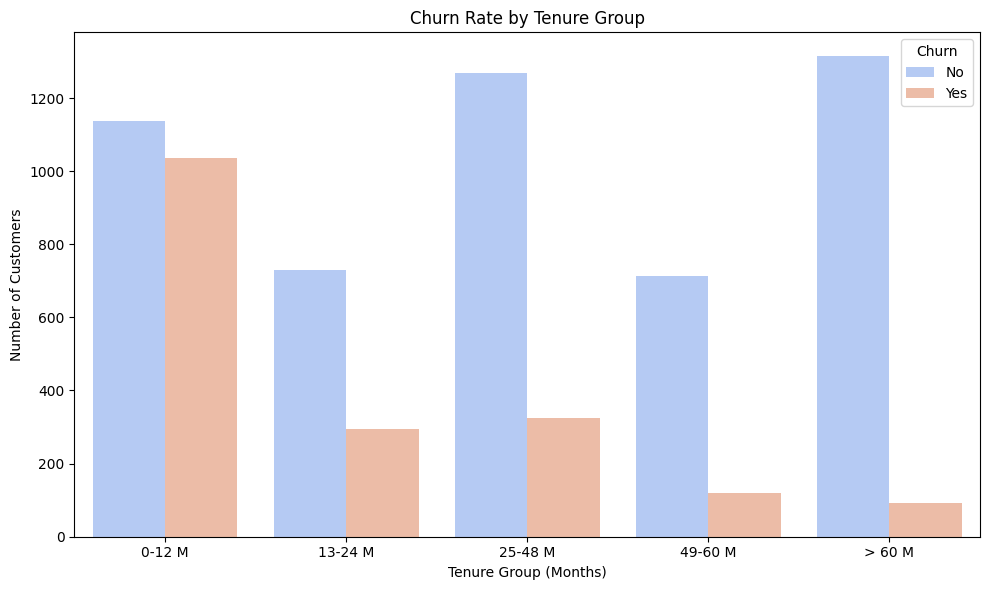

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is the original DataFrame with 'Churn' as 'Yes'/'No'
# Create tenure groups for better visualization
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, np.inf],
                            labels=['0-12 M', '13-24 M', '25-48 M', '49-60 M', '> 60 M'])

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tenure_group', hue='Churn', palette='coolwarm')
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

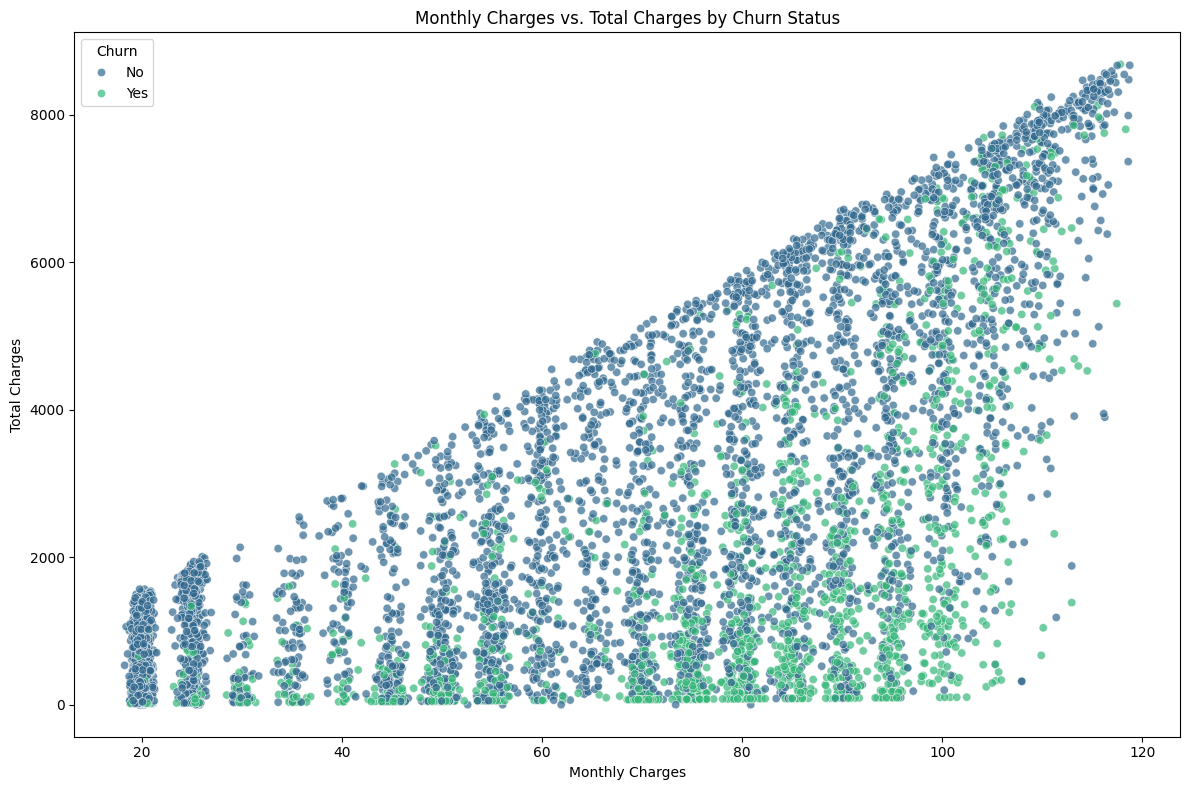

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the original DataFrame with 'Churn' as 'Yes'/'No'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='viridis', alpha=0.7)
plt.title('Monthly Charges vs. Total Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.tight_layout()
plt.show()

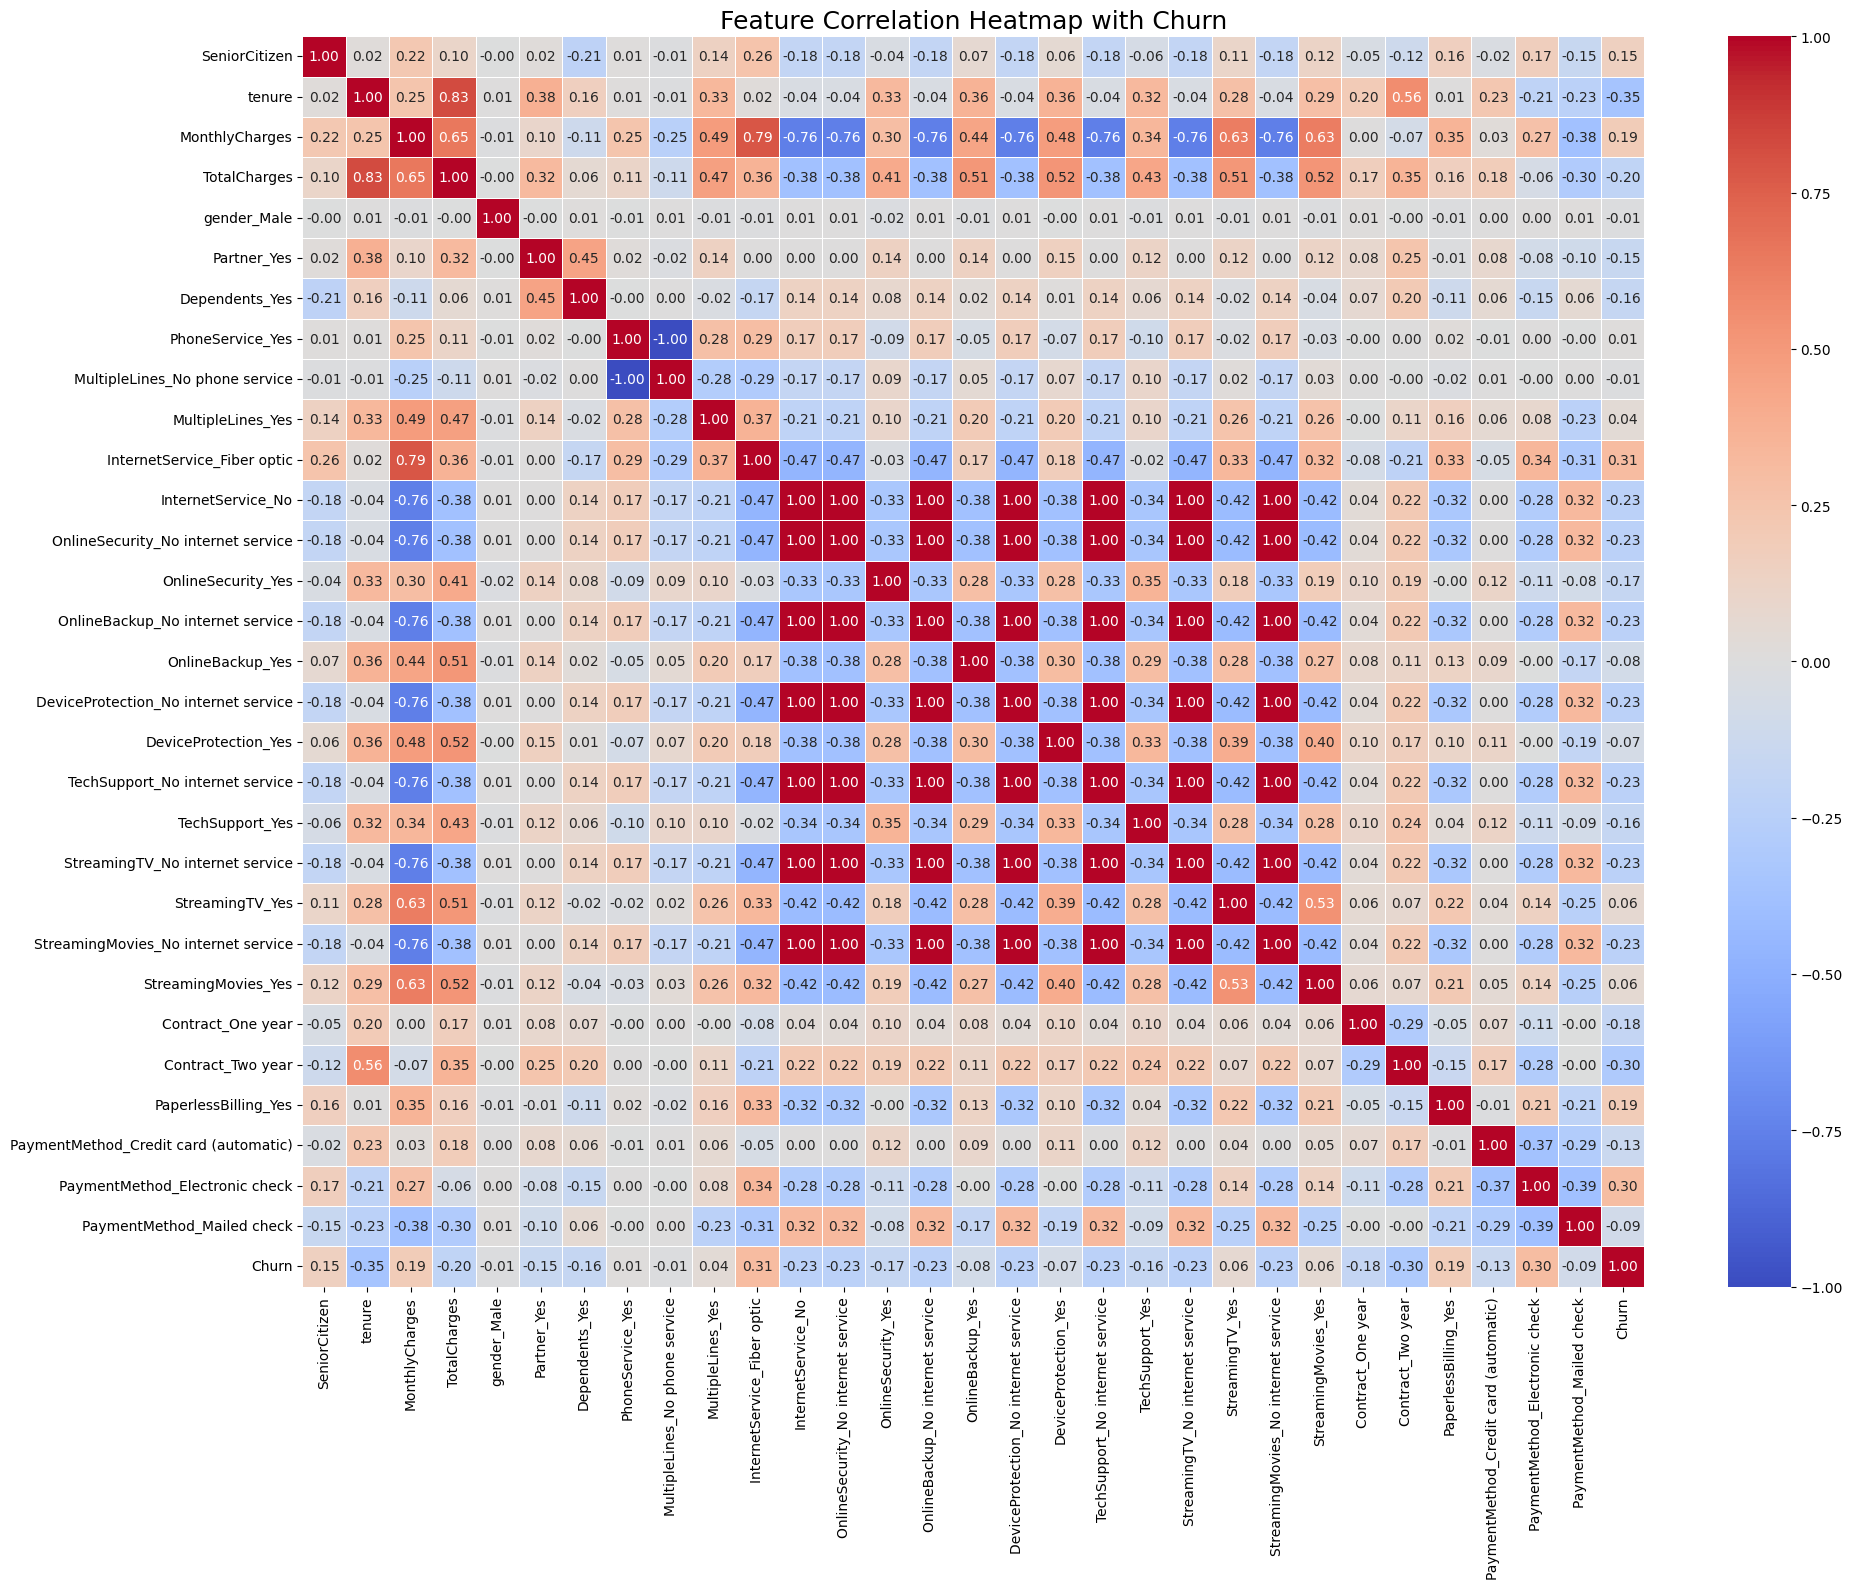

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# To calculate correlations with the target, we need to add 'y' back to 'X'
# for a temporary DataFrame, or use the original 'df' if it has been preprocessed.
# Assuming 'df' in the global scope still contains the original (or minimally processed) data
# and 'y' is the encoded target.

# First, ensure 'df' has the encoded 'Churn' for correlation calculation
# Create a copy to avoid modifying the original 'df' if not intended
df_corr = df.copy()
df_corr['Churn'] = y # 'y' is the LabelEncoded target from previous steps

# Ensure all columns are numeric for correlation calculation
# If X contains boolean values from one-hot encoding, convert them to int
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

df_corr_numeric = X.copy()
df_corr_numeric['Churn'] = y

# Calculate the correlation matrix
correlation_matrix = df_corr_numeric.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 16)) # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Heatmap with Churn', fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()